***Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
Dataset Description:
The dataset consists of the following variables:
Age: Age in years
KM: Accumulated Kilometers on odometer
FuelType: Fuel Type (Petrol, Diesel, CNG)
HP: Horse Power
Automatic: Automatic ( (Yes=1, No=0)
CC: Cylinder Volume in cubic centimeters
Doors: Number of doors
Weight: Weight in Kilograms
Quarterly_Tax: 
Price: Offer Price in EUROs
Taskes:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5.Apply Lasso and Ridge methods on the model.

Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
2.What techniques can be used to address multicollinearity in multiple linear regression?


Ensure to properly comment your code and provide explanations for your analysis.
Include any assumptions made during the analysis and discuss their implications.
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\HP\Downloads\MLR\MLR\ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [3]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [4]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [33]:
#plotting boxplots to determine presence of outliers

      Price  Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
0     13500         23  46986   90          0  2000      3          4      5   
1     13750         23  72937   90          0  2000      3          4      5   
2     13950         24  41711   90          0  2000      3          4      5   
3     14950         26  48000   90          0  2000      3          4      5   
4     13750         30  38500   90          0  2000      3          4      5   
...     ...        ...    ...  ...        ...   ...    ...        ...    ...   
1431   7500         69  20544   86          0  1300      3          4      5   
1432  10845         72  19000   86          0  1300      3          4      5   
1433   8500         71  17016   86          0  1300      3          4      5   
1434   7250         70  16916   86          0  1300      3          4      5   
1435   6950         76      1  110          0  1600      5          4      5   

      Weight  
0       1165  
1       1

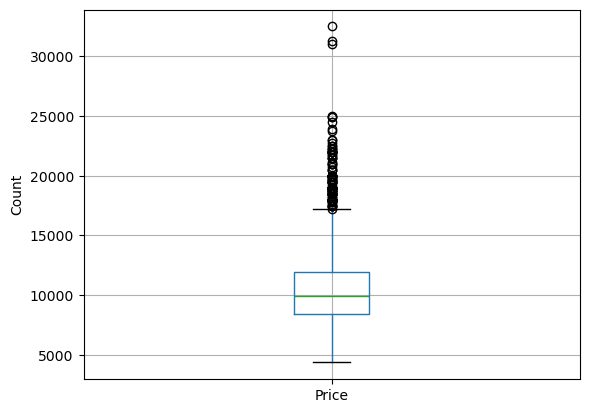

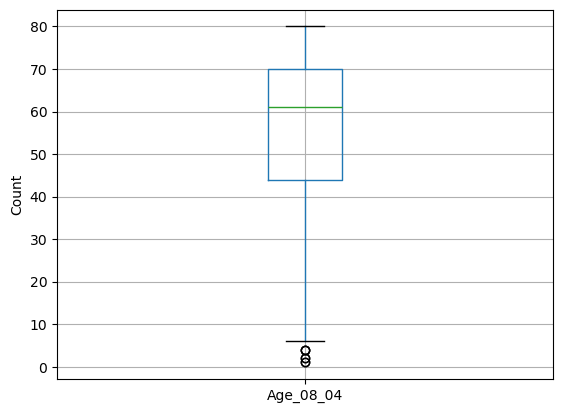

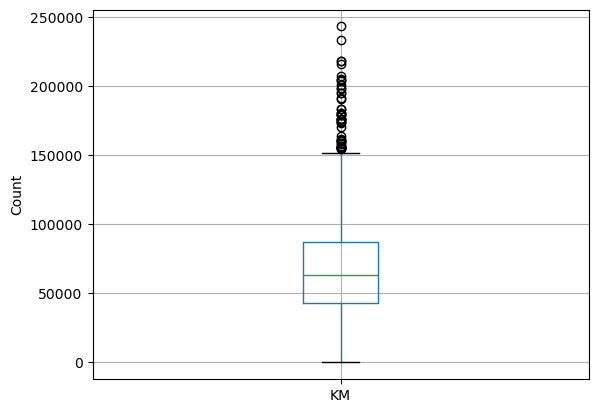

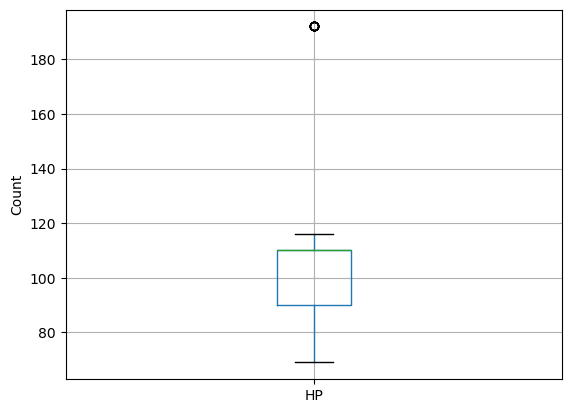

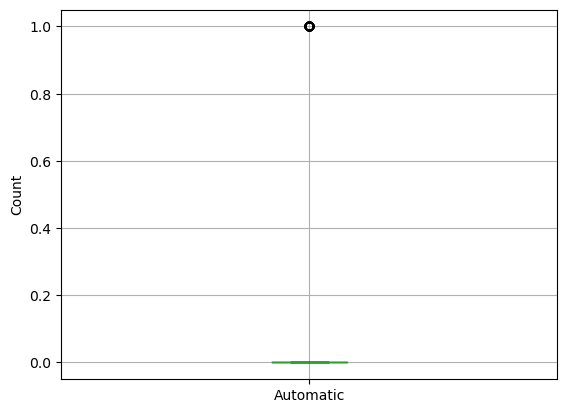

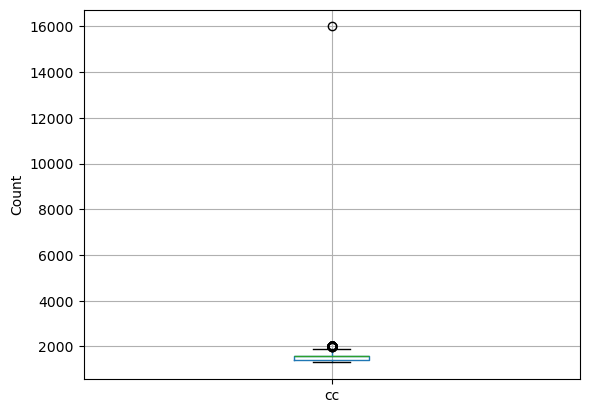

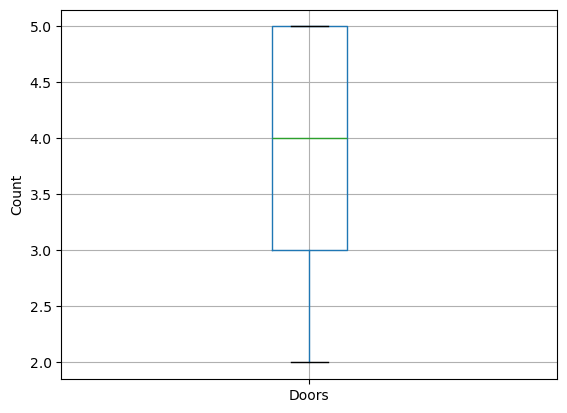

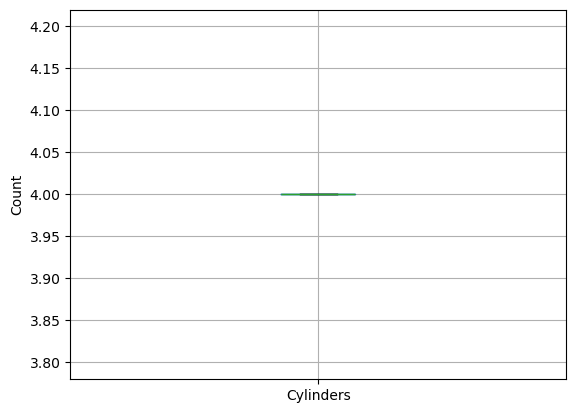

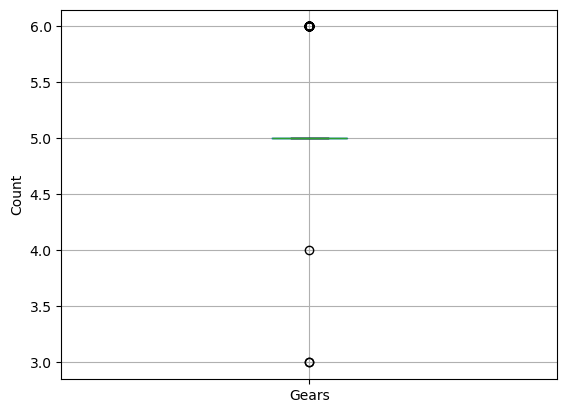

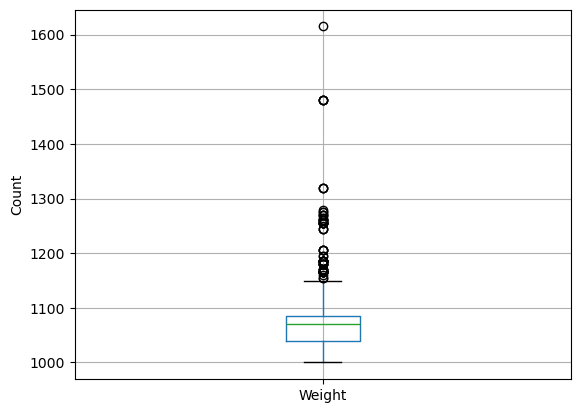

In [5]:
df_num_columns=pd.DataFrame(df.select_dtypes(include=['int64']))
print(df_num_columns)
n=len(df_num_columns.columns)
print(df_num_columns.columns)
for i in range(0,n):
    df_num_columns.boxplot(column=[df_num_columns.columns[i]])
    plt.ylabel("Count")
    plt.show()

      Price  Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
0     13500         23  46986   90          0  2000      3          4      5   
1     13750         23  72937   90          0  2000      3          4      5   
2     13950         24  41711   90          0  2000      3          4      5   
3     14950         26  48000   90          0  2000      3          4      5   
4     13750         30  38500   90          0  2000      3          4      5   
...     ...        ...    ...  ...        ...   ...    ...        ...    ...   
1431   7500         69  20544   86          0  1300      3          4      5   
1432  10845         72  19000   86          0  1300      3          4      5   
1433   8500         71  17016   86          0  1300      3          4      5   
1434   7250         70  16916   86          0  1300      3          4      5   
1435   6950         76      1  110          0  1600      5          4      5   

      Weight  
0       1165  
1       1

<Figure size 1000x1500 with 0 Axes>

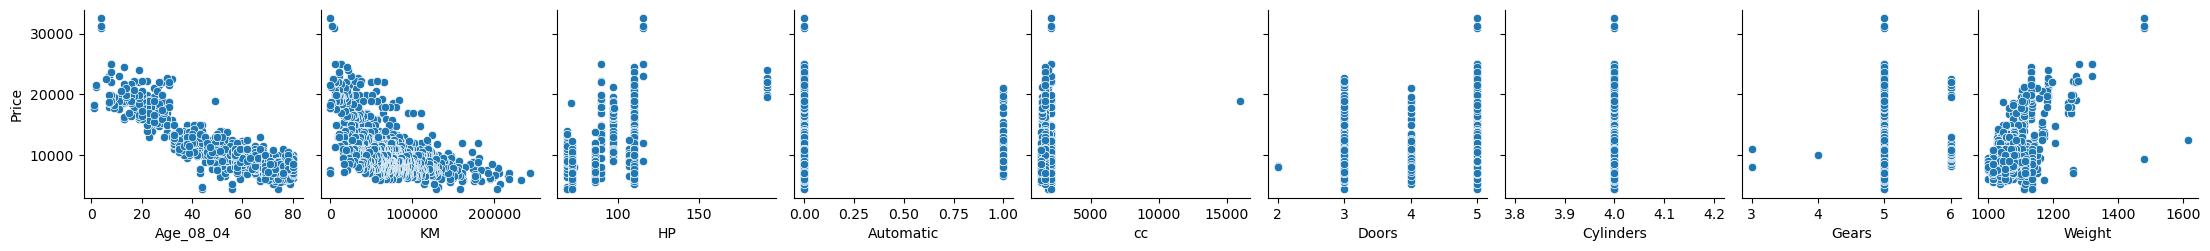

In [6]:
df_num_columns=df.select_dtypes(include=['int64'])
print(df_num_columns)
n=len(df_num_columns.columns)
#print(df_num_columns.columns)
plt.figure(figsize=(10,15))
sns.pairplot(df_num_columns,x_vars=df_num_columns.columns[1:],y_vars="Price")
plt.show()

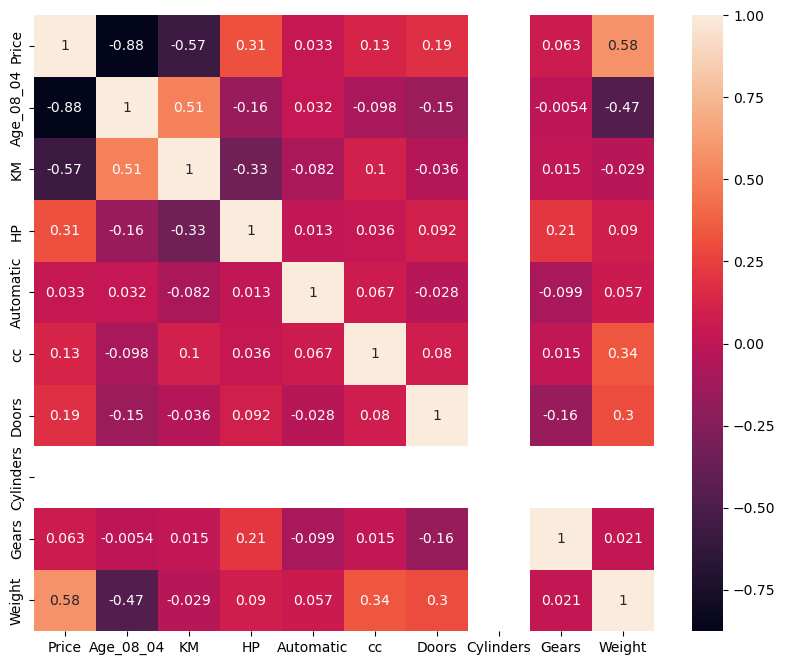

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num_columns.corr(),annot=True)
plt.show()

In [8]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [34]:
#converting categorical values to numeric values

In [9]:
df = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True, dtype=int)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [10]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961,0.107939,0.880223
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112,0.310411,0.324814
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000,0.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000,0.000000,1.000000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000,0.000000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000,0.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000,1.000000,1.000000


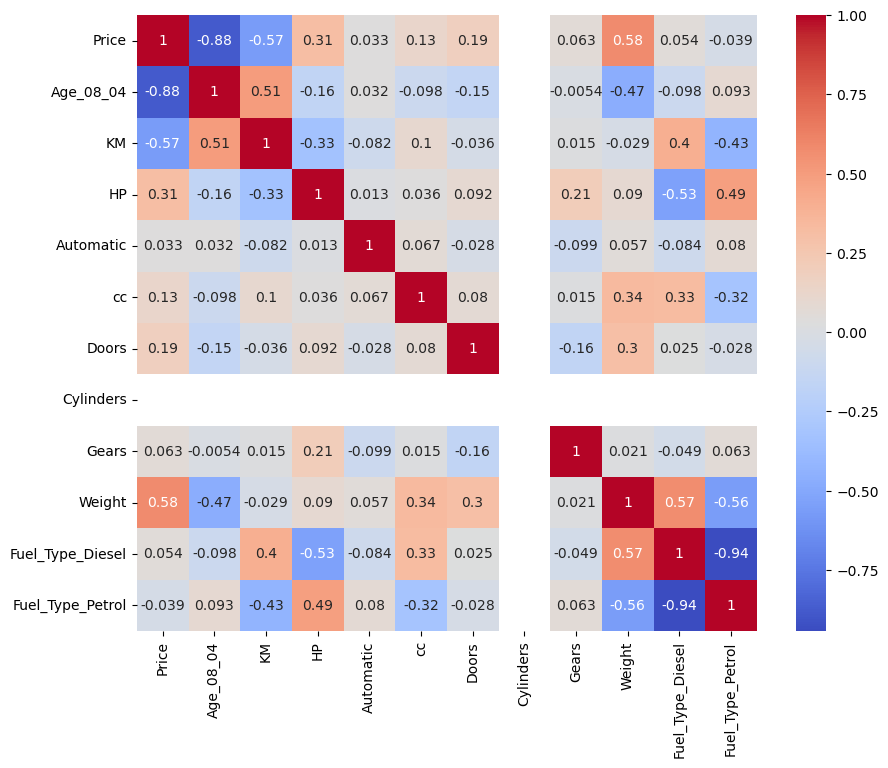

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [35]:
#removing outliers

In [12]:
for col in df.columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    df_cleaned = df[(df[col]>=lower_range) & (df[col]<=upper_range)]

print(df.shape)
print(df_cleaned.shape)

(1436, 12)
(1264, 12)


In [36]:
#initializing X and Y and also standardizing the X values before splitting the train and test data, after that splitting data

In [13]:
from sklearn.model_selection import train_test_split
X=df_cleaned.drop(["Price"],axis=1)
Y=df_cleaned[["Price"]]

from sklearn.preprocessing import StandardScaler

# 1. Initialize the scaler
scaler = StandardScaler()

# 2. Fit and transform the data
# Note: Only scale the features (X), not the target (y)
X_scaled = scaler.fit_transform(X)

# 3. Convert back to a DataFrame (Optional, for readability)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X)
print(X_scaled_df)

X_train, X_test, Y_train, Y_test=train_test_split(X_scaled_df,Y,test_size=0.2,random_state=42)
print(X_train.head())

      Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  Weight  \
8            27  19700  192          0  1800      3          4      5    1185   
10           25  31461  192          0  1800      3          4      6    1185   
11           22  43610  192          0  1800      3          4      6    1185   
12           25  32189  192          0  1800      3          4      6    1185   
13           31  23000  192          0  1800      3          4      6    1185   
...         ...    ...  ...        ...   ...    ...        ...    ...     ...   
1431         69  20544   86          0  1300      3          4      5    1025   
1432         72  19000   86          0  1300      3          4      5    1015   
1433         71  17016   86          0  1300      3          4      5    1015   
1434         70  16916   86          0  1300      3          4      5    1015   
1435         76      1  110          0  1600      5          4      5    1114   

      Fuel_Type_Diesel  Fue

In [14]:
print(len(X_test))
print(len(X_train))
print(len(Y_test))
print(len(Y_train))

253
1011
253
1011


In [37]:
#FIRST MODEL using all the independent variables

In [15]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,Y_train)
print(mlr.intercept_)
print(mlr.coef_)

[10689.30817136]
[[-2.41841333e+03 -4.14051010e+02  3.81628119e+02  1.04308488e+02
   7.96549132e+00  1.98060987e+01 -2.48689958e-14  1.37347482e+02
   4.86835989e+02  0.00000000e+00  0.00000000e+00]]


In [16]:
print(X_test)

      Age_08_04        KM        HP  Automatic        cc     Doors  Cylinders  \
1208   1.225075 -0.235972  0.455469  -0.258199  0.169784  1.025615        0.0   
868    0.514656 -0.773173 -1.430567   3.872983 -0.533091 -1.075483        0.0   
532    0.405361  1.734099  0.455469  -0.258199  0.169784  1.025615        0.0   
344   -0.414353  0.785053  0.455469  -0.258199  0.169784 -1.075483        0.0   
405   -0.141115 -0.125899  0.455469  -0.258199  0.169784 -0.024934        0.0   
...         ...       ...       ...        ...       ...       ...        ...   
163   -0.906182  0.526581  0.455469  -0.258199  0.169784  1.025615        0.0   
485   -0.414353 -0.916798 -0.566134  -0.258199 -0.298800 -1.075483        0.0   
679    0.405361  0.313563 -1.430567  -0.258199 -0.533091 -1.075483        0.0   
221   -1.015477 -0.537611  0.455469  -0.258199  0.169784 -1.075483        0.0   
243   -0.742239 -0.758983  0.455469  -0.258199  0.169784 -1.075483        0.0   

         Gears    Weight  F

In [38]:
#Predicting using FIRST MODEL

In [17]:
Y_pred=mlr.predict(X_test)
print(Y_pred)

[[ 8140.49915894]
 [ 9365.07282852]
 [ 9307.19732922]
 [11261.06233202]
 [10871.62014171]
 [ 8769.82443356]
 [15249.94712935]
 [ 9167.42295876]
 [17517.80481468]
 [ 8599.57935433]
 [ 8008.36021479]
 [11586.8313775 ]
 [11181.18391107]
 [10730.91509022]
 [ 6372.93856809]
 [11206.20695622]
 [ 8957.9243851 ]
 [16516.37644768]
 [11151.96015069]
 [10280.78152228]
 [ 9466.89130562]
 [11110.85940506]
 [ 6544.42702328]
 [ 8430.38203317]
 [ 8751.93548041]
 [10110.39381297]
 [11583.88219554]
 [ 6391.57565723]
 [11216.832095  ]
 [ 8927.01539659]
 [ 9942.8280237 ]
 [11933.91808151]
 [ 9615.91679009]
 [ 9701.96790526]
 [17408.08187819]
 [12639.37496838]
 [ 6195.44485496]
 [ 7823.37693632]
 [ 6511.85309144]
 [ 8089.56789305]
 [10176.31856281]
 [13819.83037419]
 [13360.44645698]
 [ 7275.82306053]
 [ 9857.10453825]
 [15124.80191751]
 [13743.59012311]
 [13343.79987477]
 [10305.22368496]
 [ 9833.89744754]
 [ 8584.6097925 ]
 [17579.82836394]
 [11232.87789234]
 [ 8019.62155923]
 [11873.83222742]
 [ 8200.37

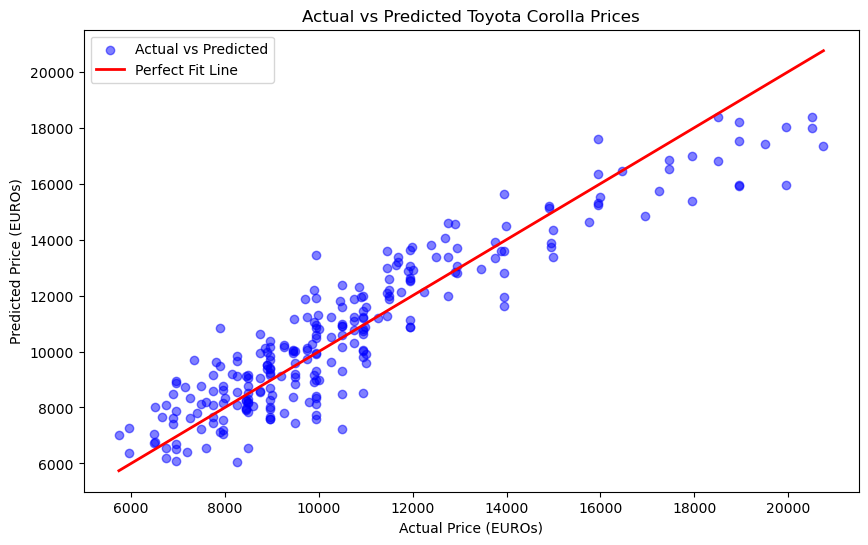

In [18]:
# 1. Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5, label='Actual vs Predicted')

# 2. Add the "Perfect Prediction" line
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Perfect Fit Line')

# 3. Add labels
plt.xlabel('Actual Price (EUROs)')
plt.ylabel('Predicted Price (EUROs)')
plt.title('Actual vs Predicted Toyota Corolla Prices')
plt.legend()
plt.show()

In [39]:
#FINDING THE VARIANCE INFLATION FACTORS

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1=pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])], index=X_train.columns)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

Age_08_04           1.888132
KM                  1.593357
HP                  1.555766
Automatic           1.087819
cc                  1.091964
Doors               1.242392
Cylinders                NaN
Gears               1.142660
Weight              2.042820
Fuel_Type_Diesel         NaN
Fuel_Type_Petrol         NaN
dtype: float64



C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [40]:
# SECOND MODEL WITH REMOVING SOME OF THE INDEPENDENT VARIABLES

In [20]:
X2=X_scaled_df.drop(['Fuel_Type_Diesel','Cylinders','Fuel_Type_Petrol','Weight','Doors'],axis=1)
Y=df_cleaned[["Price"]]
print(X2.shape)
print(Y.shape)

X2_train, X2_test, Y_train, Y_test=train_test_split(X2, Y, test_size=0.2, random_state=42)
mlr1=LinearRegression()
mlr1.fit(X2_train, Y_train)
print(mlr1.intercept_)
print(mlr1.coef_)

(1264, 6)
(1264, 1)
[10688.79861601]
[[-2611.1063769   -405.39027434   600.86195973   187.17849627
     34.84938082   121.26579746]]


In [21]:
Y_pred1=mlr1.predict(X2_test)
print(Y_pred1)

[[ 7797.26243392]
 [ 9485.54504536]
 [ 9138.9761038 ]
 [11664.07133985]
 [11319.9085837 ]
 [ 8634.61740334]
 [14935.31944211]
 [ 9557.96432381]
 [16772.51051579]
 [ 8769.92931653]
 [ 8263.94175479]
 [11557.05166251]
 [11581.37991673]
 [10721.30539759]
 [ 6417.0331833 ]
 [11042.63171375]
 [ 8207.1352741 ]
 [16294.91041179]
 [11573.70286446]
 [10654.27360654]
 [ 9776.21623279]
 [10962.57318175]
 [ 6700.10242356]
 [ 8103.01258101]
 [ 8564.25562818]
 [ 9980.8173355 ]
 [11495.33183688]
 [ 6133.28447552]
 [11157.17455835]
 [ 9181.15981087]
 [ 9801.19514644]
 [11821.59438887]
 [ 9831.81258741]
 [10019.6703453 ]
 [17356.99214109]
 [12680.64151343]
 [ 6256.54674666]
 [ 7816.56139077]
 [ 6566.33664874]
 [ 7849.26969538]
 [10098.54164212]
 [13897.22456135]
 [13426.51417882]
 [ 7030.44059363]
 [ 9867.83262443]
 [14608.18530765]
 [13615.67566443]
 [13712.21175795]
 [10485.79846154]
 [ 9756.53239124]
 [ 8689.13124015]
 [17565.03007517]
 [11090.85020177]
 [ 8135.96090738]
 [11762.76535501]
 [ 8171.17

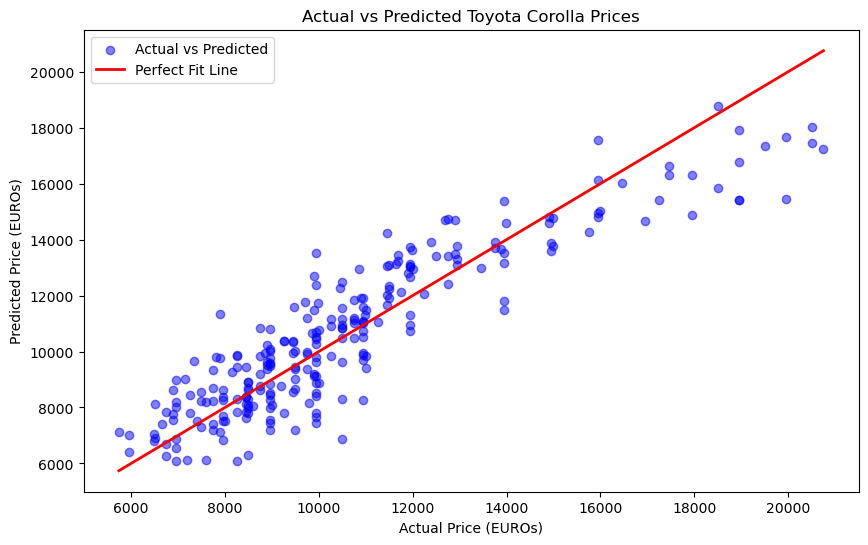

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred1, color='blue', alpha=0.5, label='Actual vs Predicted')

# 2. Add the "Perfect Prediction" line
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Perfect Fit Line')

# 3. Add labels
plt.xlabel('Actual Price (EUROs)')
plt.ylabel('Predicted Price (EUROs)')
plt.title('Actual vs Predicted Toyota Corolla Prices')
plt.legend()
plt.show()

In [41]:
# THIRD MODEL WITH REMOVING SOME MORE THE INDEPENDENT VARIABLES

(1264, 5)
(1264, 1)
[10686.86144008]
[[-2598.97044114  -421.47782298   594.11512575    57.27632856
    111.2389181 ]]
[[ 7864.6782532 ]
 [ 8776.67447928]
 [ 9164.750316  ]
 [11695.16537875]
 [11368.97360232]
 [ 8695.93348192]
 [14978.45494065]
 [ 9617.96807175]
 [16037.90382773]
 [ 8830.28937289]
 [ 8311.92280022]
 [11590.22447557]
 [11640.82119018]
 [10687.63348968]
 [ 6466.25547184]
 [11093.34475675]
 [ 8246.53625154]
 [16335.06827105]
 [11616.276462  ]
 [10691.98924978]
 [ 9814.62723899]
 [11003.78342001]
 [ 6735.25504499]
 [ 8149.55815392]
 [ 8611.50285199]
 [ 9981.01736314]
 [11547.44685838]
 [ 6177.57220552]
 [11159.7769879 ]
 [ 9227.58530718]
 [ 9834.27166451]
 [11871.59109611]
 [ 9866.1041311 ]
 [10061.41685525]
 [17405.25474713]
 [12714.12270269]
 [ 6293.07452135]
 [ 7117.36775499]
 [ 6615.15815724]
 [ 7899.77211447]
 [10078.11043758]
 [13943.44447473]
 [13470.61739275]
 [ 7029.47125422]
 [ 9890.90208317]
 [14657.31604372]
 [13667.28558189]
 [13761.32686964]
 [ 9778.66752998]


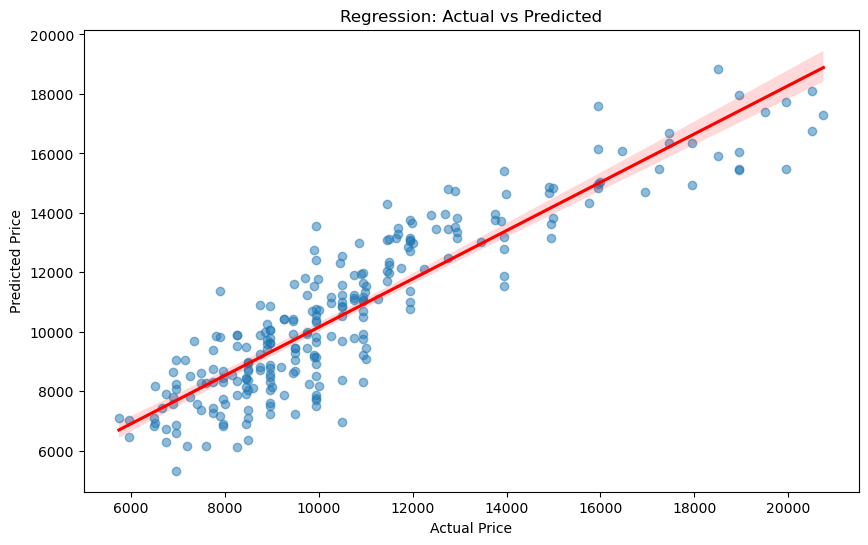

In [23]:
X3=X_scaled_df.drop(['Fuel_Type_Diesel','Cylinders','Fuel_Type_Petrol','Weight','Doors','Automatic'],axis=1)
Y=df_cleaned[["Price"]]
print(X3.shape)
print(Y.shape)

X3_train, X3_test, Y_train, Y_test=train_test_split(X3, Y, test_size=0.2, random_state=42)
mlr2=LinearRegression()
mlr2.fit(X3_train, Y_train)
print(mlr2.intercept_)
print(mlr2.coef_)

Y_pred2=mlr2.predict(X3_test)
print(Y_pred2)


plt.figure(figsize=(10, 6))
sns.regplot(x=Y_test, y=Y_pred2, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression: Actual vs Predicted')
plt.show()

In [42]:
#4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset. 

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("----------Model 1----------------")

Y_pred=mlr.predict(X_test)

# 2. Calculate metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(Y_test.mean())
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

print("--------Model 2-----------------")
Y_pred1=mlr1.predict(X2_test)

# 2. Calculate metrics
mae = mean_absolute_error(Y_test, Y_pred1)
mse = mean_squared_error(Y_test, Y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred1)

print(Y_test.mean())
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

print("--------Model 3-----------------")
# 1. Generate predictions
Y_pred2=mlr2.predict(X3_test)
#print(Y_pred2)
#print(Y_test)

# 2. Calculate metrics
mae = mean_absolute_error(Y_test, Y_pred2)
mse = mean_squared_error(Y_test, Y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred2)

print(Y_test.mean())
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")






----------Model 1----------------
Price    10643.573123
dtype: float64
Mean Absolute Error: 962.98
Root Mean Squared Error: 1208.17
R-squared Score: 0.8538
--------Model 2-----------------
Price    10643.573123
dtype: float64
Mean Absolute Error: 1053.00
Root Mean Squared Error: 1333.83
R-squared Score: 0.8218
--------Model 3-----------------
Price    10643.573123
dtype: float64
Mean Absolute Error: 1088.81
Root Mean Squared Error: 1372.22
R-squared Score: 0.8114


In [43]:
#5.Apply Lasso and Ridge methods on the model.

In [29]:
from sklearn.linear_model import Ridge, Lasso
ridge=Ridge(alpha=0.1)
ridge.fit(X_train, Y_train)
Y_pred_ridge=ridge.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred_ridge)
mse = mean_squared_error(Y_test, Y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred_ridge)

print(Y_test.mean())
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Price    10643.573123
dtype: float64
Mean Absolute Error: 962.97
Root Mean Squared Error: 1208.15
R-squared Score: 0.8538


In [32]:
lasso=Lasso(alpha=1.5)
lasso.fit(X_train, Y_train)
Y_pred_lasso=lasso.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred_lasso)
mse = mean_squared_error(Y_test, Y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred_lasso)

print(Y_test.mean())
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Price    10643.573123
dtype: float64
Mean Absolute Error: 962.93
Root Mean Squared Error: 1208.23
R-squared Score: 0.8538
